<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Φόρτωση δεδομένων

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 2. Διάγραμμα για κάθε ψηφίο

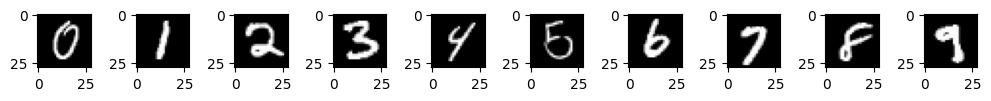

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Συνένωση train + test ώστε να έχουμε περισσότερα παραδείγματα
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

plt.figure(figsize=(10, 2))

# Για κάθε ψηφίο 0 έως 9
for digit in range(10):
    # Βρίσκουμε τα indices όπου η ετικέτα είναι digit
    indices = np.where(y == digit)[0]

    # Επιλογή τυχαίας εικόνας
    random_index = np.random.choice(indices)
    image = x[random_index]

    plt.subplot(1, 10, digit + 1)
    plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

# 3. Τι μέγεθος έχει κάθε εικόνα; Είναι σημαντικά όλα τα pixel της εικόνας ενός ψηφίου;

Κάθε εικόνα αποτελείται από: 28 × 28 = 784 pixels. Άρα κάθε εικόνα είναι διάνυσμα 784 χαρακτηριστικών.
Τα περισσότερα χαρακτηριστικά θα έχουν την τιμή 0 καθώς τα περισσότερα pixels θα είναι μαύρα(Αν τρέξω mean για το δείγμα, παίρνω μέσο όρο στο 33.32 που σημαίνει ότι πάρα πολλά είναι μαύρα). Πολλά από αυτά είναι μαύρα σχεδόν σε όλες τις εικόνες όπως για παράδειγμα τα pixels της περιμέτρου και ιδιαίτερα οι γωνίες. Άρα υπάρχει μεγάλος αριθμός χαρακτηριστικών που δεν είναι καθόλου σημαντικά.

# 4. Μετατροπή εικόνων (x_train, x_test) σε διανύσματα.

In [4]:
# x_train shape: (60000, 28, 28) -> x_train_flat: (60000, 784)
x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)

# 5. Εκπαιδεύστε ταξινομητές KNN με k=5,15,51,√N , όπου N το πλήθος των παραδειγμάτων του  train set και υπολογίστε την ακρίβεια (accuracy score) στα train,test sets. Στη συνέχεια, να δημιουργήσετε line plot με οριζόντιο άξονα το k και κάθετο άξονα την ακρίβεια.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

K_values = [5, 15, 51, int(np.sqrt(x_train_flat.shape[0]))] # [5, 15, 51, 244]

results = {'K': [], 'Train Accuracy': [], 'Test Accuracy': []}

for K in K_values:
    # Εκπαίδευση του μοντέλου (n_jobs=-1 για ταχύτητα)
    knn = KNeighborsClassifier(n_neighbors=K, n_jobs=-1)
    knn.fit(x_train_flat, y_train)

    # Υπολογισμός Ακρίβειας (Accuracy Score)
    train_acc = knn.score(x_train_flat, y_train)
    test_acc = knn.score(x_test_flat, y_test)

    # Αποθήκευση αποτελεσμάτων
    results['K'].append(K)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)

    print(f"K={K}:")
    print(f"  Ακρίβεια Εκπαίδευσης: {train_acc:.4f}")
    print(f"  Ακρίβεια Δοκιμής: {test_acc:.4f}\n")

K=5:
  Ακρίβεια Εκπαίδευσης: 0.9819
  Ακρίβεια Δοκιμής: 0.9688

K=15:
  Ακρίβεια Εκπαίδευσης: 0.9710
  Ακρίβεια Δοκιμής: 0.9633

K=51:
  Ακρίβεια Εκπαίδευσης: 0.9532
  Ακρίβεια Δοκιμής: 0.9533

K=244:
  Ακρίβεια Εκπαίδευσης: 0.9211
  Ακρίβεια Δοκιμής: 0.9241



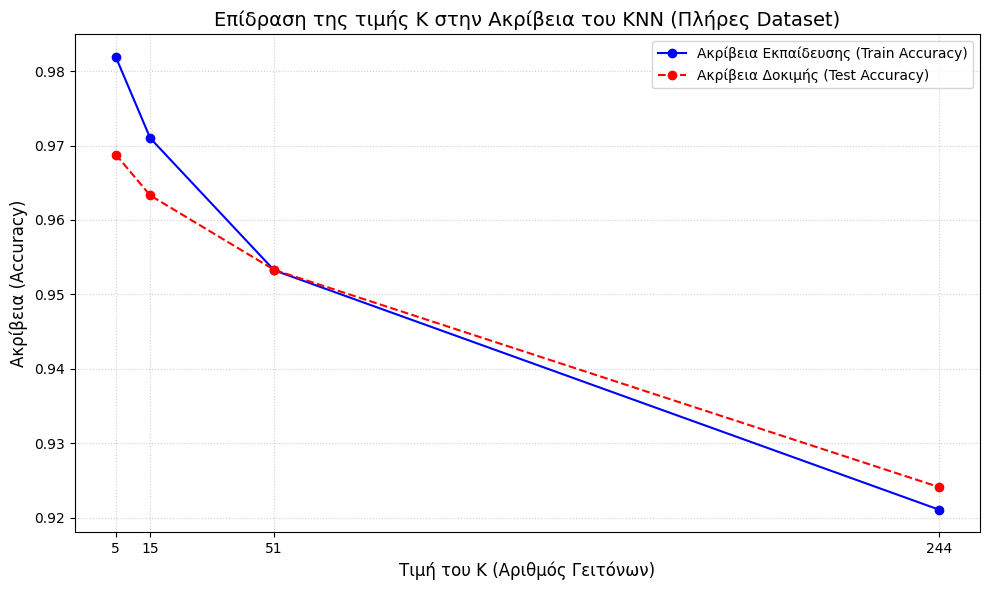

In [6]:
results_df = pd.DataFrame(results)

# Δημιουργία Plot
plt.figure(figsize=(10, 6))

plt.plot(results['K'], results['Train Accuracy'],
         marker='o', linestyle='-', color='blue',
         label='Ακρίβεια Εκπαίδευσης (Train Accuracy)')

plt.plot(results['K'], results['Test Accuracy'],
         marker='o', linestyle='--', color='red',
         label='Ακρίβεια Δοκιμής (Test Accuracy)')

plt.title('Επίδραση της τιμής K στην Ακρίβεια του KNN (Πλήρες Dataset)', fontsize=14)
plt.xlabel('Τιμή του K (Αριθμός Γειτόνων)', fontsize=12)
plt.ylabel('Ακρίβεια (Accuracy)', fontsize=12)

plt.xticks(results['K'])
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Κανονικοποίηση των τιμών (0-255) στο εύρος [0, 1]

In [7]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

# 7. Εκτέλεση ταξινόμησης για δικό μου ζωγραφισμένο ψηφίο

In [15]:
# Επανεκπαίδευση του ταξινομητή με K=5 (ο καλύτερος ταξινομητής)
K_best = 5
best_knn = KNeighborsClassifier(n_neighbors=K_best, n_jobs=-1)
best_knn.fit(x_train_norm, y_train)

# Υπολογισμός Ακρίβειας (Accuracy Score)
train_acc_norm = best_knn.score(x_train_norm, y_train)
test_acc_norm = best_knn.score(x_test_norm, y_test)

# Αποθήκευση αποτελεσμάτων
results_norm = {'K': [], 'Train Accuracy': [], 'Test Accuracy': []}
results_norm['K'].append(K_best)
results_norm['Train Accuracy'].append(train_acc_norm)
results_norm['Test Accuracy'].append(test_acc_norm)

print(f"K={K_best}:")
print(f"  Ακρίβεια Εκπαίδευσης: {train_acc_norm:.4f}")
print(f"  Ακρίβεια Δοκιμής: {test_acc_norm:.4f}\n")

K=5:
  Ακρίβεια Εκπαίδευσης: 0.9819
  Ακρίβεια Δοκιμής: 0.9688



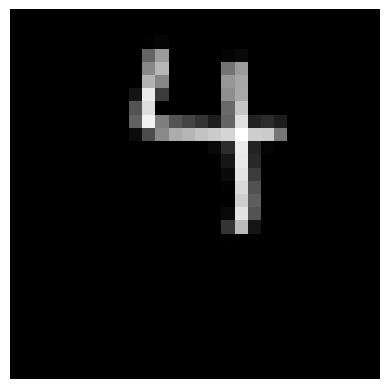

Το μοντέλο KNN (K=5) προβλέπει ότι το ψηφίο είναι: 7


In [23]:
from PIL import Image

# 1. Φόρτωση της εικόνας
image_path = "myDigit2.png"

# 2. Μετατροπή σε Ασπρόμαυρο (Grayscale)
img = Image.open(image_path).convert('L')

# 3. Μετατροπή σε 28 x 28
img = img.resize((28, 28))

# 4. Μετατροπή σε Πίνακα NumPy
# Η εικόνα πρέπει να είναι πίνακας (28, 28) με τιμές 0-255
image_array = np.array(img)

# 5. Απεικόνιση
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

# 6. Flattening (28x28 -> 784)
test_digit_flat = image_array.reshape(1, 784)

# 7. Normalization ([0, 255] -> [0, 1])
test_digit_norm = test_digit_flat / 255.0

# 8. Πρόβλεψη με τον KNN
prediction = best_knn.predict(test_digit_norm)

# 9. Εμφάνιση Αποτελέσματος
print(f"Το μοντέλο KNN (K={K_best}) προβλέπει ότι το ψηφίο είναι: {prediction[0]}")